# Data Scraping

In [2]:
import numpy as np
import pandas as pd
import os
import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import WebDriverException
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# function to save web pages from https://takemeback.to/ locally for the desired period

def convert_to_html(start_date,end_date):
    start = datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.strptime(end_date, '%Y-%m-%d')
    
    date = start
    
    while date <= end:
        formatted_date = date.strftime('%d-%B-%Y')
        formatted_date1 = date.strftime('%Y-%m-%d')
        
        r = requests.get(f'https://takemeback.to/{formatted_date}')
        with open(f'C:/Users/ASUS/Desktop/Web Pages/{formatted_date1}.html', "w", encoding='utf-8') as f:
            f.write(r.text)
       
        date += timedelta(days=1)

In [ ]:
# function to extract top10 news headlines from web pages of https://takemeback.to/ for the desired period

def extract_news(start_date,end_date):
    start = datetime.strptime(start_date, '%Y-%m-%d')  
    end = datetime.strptime(end_date, '%Y-%m-%d')
    
    date = start
    df = pd.DataFrame()
    
    while date <= end:
        formatted_date = date.strftime('%Y-%m-%d')
        with open(f'C:/Users/ASUS/Desktop/Web Pages/{formatted_date}.html', "r", encoding='utf-8') as f:
            file = f.read()

        soup = BeautifulSoup(file, 'html.parser')
        news = soup.find(id = 'events')

        data = []
        data.append(f'{formatted_date}')

        if news is not None:
            ul_tag = news.find('ul')

            sum = 0

            li_tags = ul_tag.find_all('li')

            for li in li_tags:
                if sum<10:
                    data.append(li.text)
                    sum = sum + 1

            while len(data)<11:
                data.append(None)
        else:
            for i in range(0,10):
                data.append(None)

        df1 = pd.DataFrame([data], columns = ['Date','Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10'])
        df = pd.concat([df,df1], ignore_index = True)
        
        date += timedelta(days=1)

    return df

In [ ]:
# function to save web pages from CNN locally for the desired period

def convert_to_html2(start_date,end_date):
    start = datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.strptime(end_date, '%Y-%m-%d')
    
    date = start
    while date<=end:
        formatted_date = date.strftime('%Y-%m')
        r = requests.get(f'https://edition.cnn.com/article/sitemap-{formatted_date}.html')
        with open(f'C:/Users/ASUS/Desktop/Web Pages/{formatted_date}.html', "w", encoding='utf-8') as f:
            f.write(r.text)
        date += relativedelta(months=1)

In [ ]:
# function to extract top10 news headlines from web pages of CNN for the desired period

def extract_news2(start_date,end_date):
    start1 = datetime.strptime(start_date, '%Y-%m-%d')
    end1 = datetime.strptime(end_date, '%Y-%m-%d')
    
    date1 = start1
    df = pd.DataFrame()
    while date1<=end1:
        formatted_date = date1.strftime('%Y-%m')
        with open(f'C:/Users/ASUS/Desktop/Web Pages/{formatted_date}.html', "r", encoding='utf-8') as f:
            file = f.read()

        soup = BeautifulSoup(file, 'html.parser')
        news = soup.find(class_ = 'sitemap-entries')

        dates = []
        
        date2 = date1.strftime('%Y-%m-%d')
        start = datetime.strptime(date2, '%Y-%m-%d')
        
        date1 += relativedelta(months=1)
        
        date2 = date1.strftime('%Y-%m-%d')
        end = datetime.strptime(date2, '%Y-%m-%d')

        date = start
        while date<end:
            dates.append(date.strftime('%Y-%m-%d'))
            date += timedelta(days=1)

        for i in range(0,len(dates)):
            data = []
            data.append(dates[i])
            if news is not None:
                ul_tag = news.find('ul')

                li_tags = ul_tag.find_all('li')

                sum = 0

                for li in li_tags:
                    date = li.find(class_ = 'date')
                    headline = li.find(class_ = 'sitemap-link')
                    if date.text == dates[i]:
                        if sum<10:
                            data.append(headline.text)
                            sum = sum + 1

                while len(data)<11:
                    data.append(None)

            else:
                for i in range(0,10):
                    data.append(None)

            df1 = pd.DataFrame([data], columns = ['Date','Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10'])
            df = pd.concat([df,df1], ignore_index = True)
        
    return df

In [ ]:
# function to extract financial news articles and financial reports from New York Times for the desired period

def financial(start_date,end_date):
    start1 = datetime.strptime(start_date, '%Y-%m-%d')
    end1 = datetime.strptime(end_date, '%Y-%m-%d')
    
    date1 = start1
    df = pd.DataFrame()
    while date1<=end1:
        dates = []

        date2 = date1.strftime('%Y-%m-%d')
        start = datetime.strptime(date2, '%Y-%m-%d')
        
        date1 += relativedelta(months=1)

        date2 = date1.strftime('%Y-%m-%d')
        end = datetime.strptime(date2, '%Y-%m-%d')

        date = start
        while date<end:
            dates.append(date.strftime('%Y-%m-%d'))
            date += timedelta(days=1)
            
        while True:
            try:
                driver = webdriver.Chrome()
                driver.set_page_load_timeout(30)

                while True:
                    try:
                        driver.get(f"https://www.nytimes.com/search?dropmab=false&endDate={dates[-1]}&query=Amazon&sort=oldest&startDate={dates[0]}")
                        break

                    except Exception as e:
                        pass

                button = driver.find_element(By.XPATH, '//button[@data-testid="search-show-more-button"]')

                while button is not None:
                    try:
                        button.click()
                    except:
                        break



                articles = driver.find_elements(By.CSS_SELECTOR, 'li.css-1l4w6pd')

                links = []

                for article in articles:
                    div_tag = article.find_element(By.CSS_SELECTOR, 'div.css-e1lvw9')
                    link_tag =  div_tag.find_element(By.TAG_NAME, 'a')
                    link = link_tag.get_attribute('href')
                    links.append(link)

                for i in range(len(links)):
                    links[i] = links[i].split('?')[0]

                links = list(set(links))



                df2 = pd.DataFrame()

                for link in links:
                    try:
                        data = []

                        s = 0
                        while True:
                            try:
                                driver.get(link)
                                break
                            except Exception as e:
                                s = s+1
                                pass



                        text = []
                        try:
                            archive = driver.find_element(By.CSS_SELECTOR, 'h1.nytc-header')
                            text.append(archive.text)
                        except:
                            pass

                        if len(text) == 0:
                            date = driver.find_element(By.TAG_NAME, 'time')
                            content = driver.find_element(By.NAME, 'articleBody')

                        else:
                            date = driver.find_element(By.TAG_NAME, 'time')
                            content = driver.find_element(By.CSS_SELECTOR, 'div.entry-content')

                        date_text = parse(date.text)
                        formatted_date = date_text.strftime('%Y-%m-%d')

                        data.append(formatted_date)    
                        data.append(content.text)               

                        df1 = pd.DataFrame([data], columns = ['Date','News'])
                        df2 = pd.concat([df2,df1], ignore_index = True)
                        
                    except:
                        pass



                grouped_df = df2.groupby('Date')
                sorted_df = pd.DataFrame()

                for actual_date in dates:
                    data = []

                    data.append(actual_date)

                    try:
                        group = grouped_df.get_group(actual_date)
                        for news in group['News']:
                            data.append(news)
                            break                

                    except:
                        data.append(None)

                    df1 = pd.DataFrame([data], columns = ['Date','News'])
                    sorted_df = pd.concat([sorted_df,df1], ignore_index = True)

                df = pd.concat([df,sorted_df], ignore_index = True)
                print(dates[0])

                break
                
            except Exception as e:
                pass
        
    return df

In [ ]:
# function to combine news from takemeback.to and CNN

def combine_news(total_news, total_news2):
    for i in range(0,len(total_news)):
        for j in range(1,11):
            news1 = total_news.at[i, f'Top{j}']
            if pd.isna(news1) is True:
                for k in range(1,11):
                    news2 = total_news2.at[i, f'Top{k}']
                    if pd.isna(news2) is False:
                        news1 = news2
                        news2 = None
                        total_news[f'Top{j}'][i] = news1
                        total_news2[f'Top{k}'][i] = news2
                        break
                        
    return total_news

### Scraping Train Data for the period 2012-2021

In [ ]:
start = '2012-01-01'
end = '2021-12-31'

In [ ]:
total_news = pd.DataFrame()
total_news2 = pd.DataFrame()

convert_to_html(start,end)
convert_to_html2(start,end)

total_news = extract_news(start,end)
total_news2 = extract_news2(start,end)

In [ ]:
training_daily_news = combine_news(total_news, total_news2)

In [ ]:
training_financial_news = financial(start,end)

In [ ]:
training_daily_news.to_csv('C:/Users/ASUS/Desktop/training_daily_news.csv', index = False)
training_financial_news.to_csv('C:/Users/ASUS/Desktop/training_financial_news.csv', index = False)

### Scraping Test Data for the period 2021-2023

In [ ]:
start = '2022-01-01'
end = '2023-12-31'

In [ ]:
total_news = pd.DataFrame()
total_news2 = pd.DataFrame()

convert_to_html(start,end)
convert_to_html2(start,end)

total_news = extract_news(start,end)
total_news2 = extract_news2(start,end)

In [ ]:
test_daily_news = combine_news(total_news, total_news2)

In [ ]:
test_financial_news = financial(start,end)

In [ ]:
test_daily_news.to_csv('C:/Users/ASUS/Desktop/test_daily_news.csv', index = False)
test_financial_news.to_csv('C:/Users/ASUS/Desktop/test_financial_news.csv', index = False)

# Sentiment Analysis

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from dateutil.parser import parse
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, \
ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pickle

In [5]:
# function to remove punctuations from textual data

def remove_punc(news):
    cleaned_news = news.iloc[:,1:]
    cleaned_news.replace("[^a-zA-Z]"," ", regex = True, inplace = True)

    dates = pd.DataFrame(news['Date'])

    cleaned_news = dates.join(cleaned_news, how = 'left')
    return cleaned_news

In [6]:
# function to apply day-of-the-week effect

def monday_score(df,column,index):
    score = 0
    n = 0
    while n<3:
        index = index - n
        try:
            score += df[column][index] * np.exp(-n)
        except:
            pass
        n += 1
    return score

In [7]:
# function to calculate sentiment scores for each day using pretrained transformers model

def sentiment_analysis(daily_news, financial_news): 
    
    df1 = remove_punc(daily_news)
    df2 = remove_punc(financial_news)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)

    model.to(device)

    mean_pos = []
    mean_neu = []
    mean_neg = []

    for i in range(len(df1)):
        pos = []
        neu = []
        neg = []

        for column in df1.columns:
            try:
                text = str(df1[column][i])

                encoded_text = tokenizer(text, return_tensors='pt').to(device)

                with torch.no_grad():
                    output = model(**encoded_text)

                scores = output.logits[0].cpu().numpy()
                scores = softmax(scores)

                pos.append(scores[2])
                neu.append(scores[1])
                neg.append(scores[0])

            except Exception as e:
                print(f"Error processing column '{column}', row {i}: {e}")
                continue

        for column in df2.columns:
            try:
                text2 = str(df2[column][i])

                encoded_text2 = tokenizer(text, return_tensors='pt').to(device)

                with torch.no_grad():
                    output2 = model(**encoded_text2)

                scores2 = output2.logits[0].cpu().numpy()
                scores2 = softmax(scores2)

                pos2 = scores2[2]
                neu2 = scores2[1]
                neg2 = scores2[0]

            except Exception as e:
                print(f"Error processing column '{column}', row {i}: {e}")
                continue
  
        if pos is not None and pos2 is not None:
            mean_pos.append(0.2*st.mean(pos)+0.8*pos2)
            mean_neu.append(0.2*st.mean(neu)+0.8*neu2) 
            mean_neg.append(0.2*st.mean(neg)+0.8*neg2) 

        elif pos is not None and pos2 is None:
            mean_pos.append(st.mean(pos))
            mean_neu.append(st.mean(neu))
            mean_neg.append(st.mean(neg))

        elif pos is None and pos2 is not None:
            mean_pos.append(pos2)
            mean_neu.append(neu2)
            mean_neg.append(neg2)

        else:
            mean_pos.append(None)
            mean_neu.append(None)
            mean_neg.append(None)

    df1['mean_pos'] = mean_pos
    df1['mean_neu'] = mean_neu
    df1['mean_neg'] = mean_neg
    
    columns = ['mean_pos','mean_neu','mean_neg']
    for i in range(len(df1)):
        date = datetime.strptime(df1['Date'][i], '%Y-%m-%d')
        day = date.strftime('%A')

        if day == 'Monday':
            for column in columns:
                df1[column][i] = monday_score(df1,column,i)
                
    return df1

In [8]:
# function to extract lagging features and moving averages

def extract_features(dataframe,column_list):
    for column in column_list:
        for lag in range(1, 8):
            dataframe[f'{column}_lag_{lag}'] = dataframe[column].shift(lag)

        dataframe[f'{column}_ma_7'] = dataframe[column].rolling(window=7).mean()

In [17]:
# function to prepare data for ML models

def prepare_model_data(sentiment_score_data, stock_market_data):
    for i in range(len(sentiment_score_data)):
        if sentiment_score_data['Date'][i] not in stock_market_data['Date'].values:
            sentiment_score_data.drop(i,inplace = True)

    sentiment_score_data.reset_index(drop=True, inplace=True)
    
    prepared_data = stock_market_data.join(sentiment_score_data.iloc[:,11:], how = 'left')
    
    prepared_data['Label'] = prepared_data['Label'].astype(float)
    prepared_data.dropna(inplace=True)
    
    return prepared_data

In [10]:
# function to get stock market data of a company for the desired period

def get_market_data(start_date, end_date, ticker_symbol):
    start = start_date
    end = end_date

    ticker = ticker_symbol

    stock_data = yf.download(ticker, start, end)

    stock_data['Label'] = None

    for i in range(1,len(stock_data)):
        if stock_data['Close'][i] < stock_data['Close'][i-1]:
            stock_data['Label'][i] = 1

        elif stock_data['Close'][i] > stock_data['Close'][i-1]:
            stock_data['Label'][i] = 0

    stock_data = stock_data.reset_index()

    stock_data.drop(index = 0, inplace = True)
    stock_data = stock_data.reset_index(drop = True)

    stock_data['Date'] = stock_data['Date'].astype(str)
    
    return stock_data

In [105]:
# loading training data

training_daily_news = pd.read_csv('C:\\Users\\ASUS\\Desktop\\training_daily_news.csv')
training_financial_news = pd.read_csv('C:/Users/ASUS/Desktop/training_financial_news.csv')

In [106]:
data = sentiment_analysis(training_daily_news,training_financial_news)
extract_features(data,['mean_pos','mean_neg'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28096\3332094521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_news.replace("[^a-zA-Z]"," ", regex = True, inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28096\3332094521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_news.replace("[^a-zA-Z]"," ", regex = True, inplace = True)


Using device: cuda


C:\ProgramData\anaconda3\envs\py310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28096\2645426488.py:111: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps 

In [114]:
market_data = get_market_data('2011-12-30','2022-01-01', 'AMZN')
extract_features(market_data,['Close'])

[*********************100%%**********************]  1 of 1 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28096\2449375462.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data['Close'][i] < stock_data['Close'][i-1]:
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28096\2449375462.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif stock_data['Close'][i] > stock_data['Close'][i-1]:
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28096\2449375462.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in c

In [118]:
model_data = prepare_model_data(data,market_data)

In [120]:
X = model_data.drop(columns = ['Label','Open','Date','Close','Adj Close','High','Low','Volume','mean_pos','mean_neg','mean_neu'])
y = model_data['Label']

In [121]:
# scaling the data to the range 0 to 1

sc = MinMaxScaler(feature_range=(0,1))
X[X.columns] = sc.fit_transform(X[X.columns])

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

Logistic Regression


Model performance for Training set
- Accuracy: 0.5479
- F1 score: 0.5145
- Precision: 0.5335
- Recall: 0.2716
- Roc Auc Score: 0.5313
----------------------------------
Model performance for Test set
- Accuracy: 0.5040
- F1 score: 0.4788
- Precision: 0.4101
- Recall: 0.2545
- Roc Auc Score: 0.4798


Validation Score: [0.5059761  0.47011952 0.54581673 0.51696607 0.53692615]


AUC: 0.50


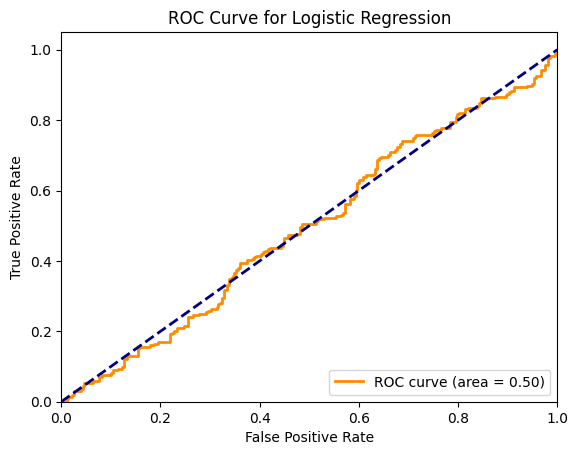



Decision Tree


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.4821
- F1 score: 0.4828
- Precision: 0.4224
- Recall: 0.4375
- Roc Auc Score: 0.4777


Validation Score: [0.49203187 0.46215139 0.53784861 0.51097804 0.5249501 ]


AUC: 0.48


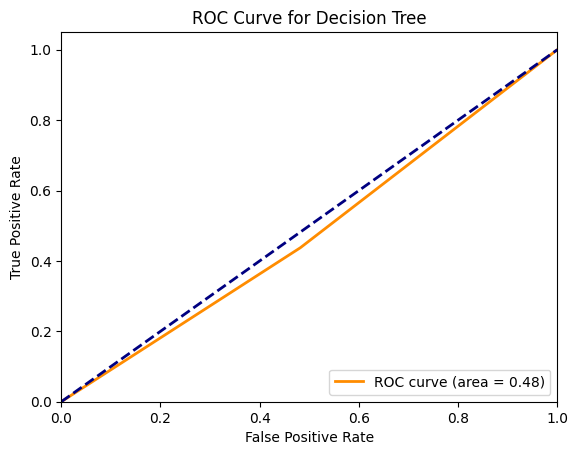



Random Forest


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5120
- F1 score: 0.5030
- Precision: 0.4413
- Recall: 0.3527
- Roc Auc Score: 0.4965


Validation Score: [0.46613546 0.47211155 0.50398406 0.52295409 0.47105788]


AUC: 0.53


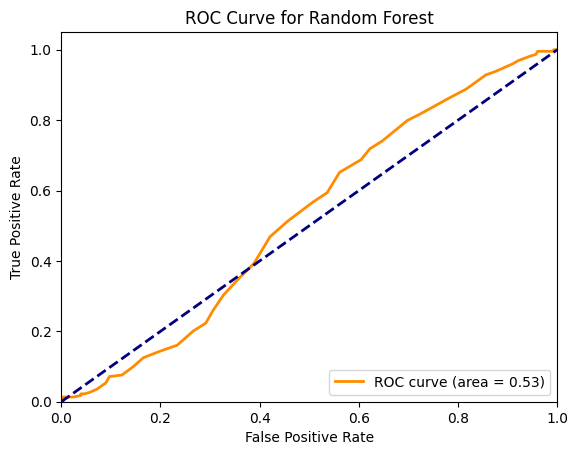



XGB


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5538
- F1 score: 0.5529
- Precision: 0.5000
- Recall: 0.4821
- Roc Auc Score: 0.5468


Validation Score: [0.47410359 0.48804781 0.47410359 0.53892216 0.47105788]


AUC: 0.56


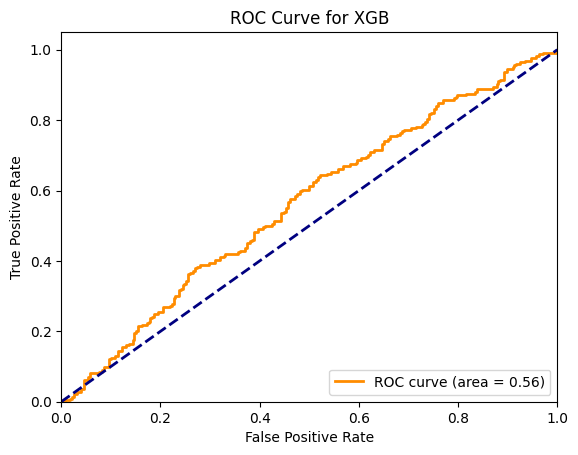



SVC


Model performance for Training set
- Accuracy: 0.6296
- F1 score: 0.6054
- Precision: 0.6937
- Recall: 0.3738
- Roc Auc Score: 0.6143
----------------------------------
Model performance for Test set
- Accuracy: 0.5558
- F1 score: 0.5314
- Precision: 0.5037
- Recall: 0.3036
- Roc Auc Score: 0.5313


Validation Score: [0.45219124 0.47410359 0.53386454 0.50499002 0.47704591]




Linear Discriminant Analysis


Model performance for Training set
- Accuracy: 0.8659
- F1 score: 0.8643
- Precision: 0.9295
- Recall: 0.7721
- Roc Auc Score: 0.8603
----------------------------------
Model performance for Test set
- Accuracy: 0.8207
- F1 score: 0.8190
- Precision: 0.8418
- Recall: 0.7366
- Roc Auc Score: 0.8125


Validation Score: [0.70717131 0.70318725 0.84063745 0.91017964 0.95808383]


AUC: 0.92


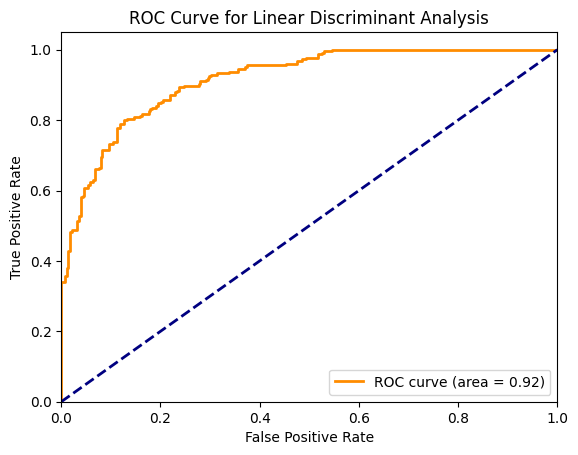

In [125]:
# Trying out different ML models with the dataset to
# pick the model with the best metrics

models = {"Logistic Regression":LogisticRegression(),"Decision Tree":DecisionTreeClassifier(),"Random Forest":RandomForestClassifier(),"XGB":XGBClassifier(),"SVC":SVC(),"Linear Discriminant Analysis":LinearDiscriminantAnalysis()}

for i in range(len(list(models))):
    try:
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        skf = StratifiedKFold(n_splits=5)
        cross_score = cross_val_score(model, X, y, cv = skf)

        model_train_accuracy = accuracy_score(y_train, y_train_pred)
        model_train_f1 = f1_score(y_train, y_train_pred, average = 'weighted')
        model_train_precision = precision_score(y_train, y_train_pred)
        model_train_recall = recall_score(y_train, y_train_pred)
        model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

        model_test_accuracy = accuracy_score(y_test, y_test_pred)
        model_test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
        model_test_precision = precision_score(y_test, y_test_pred)
        model_test_recall = recall_score(y_test, y_test_pred)
        model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

        print(list(models.keys())[i])
        print('\n')

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 score: {:.4f}".format(model_train_f1))

        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("- F1 score: {:.4f}".format(model_test_f1))

        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
        print('\n')
        print(f"Validation Score: {cross_score}")
        print('\n')
        
        try:
            y_pred_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.2f}")
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {list(models.keys())[i]}')
            plt.legend(loc='lower right')
            plt.show()

            with open(f'{model}.pickle','wb') as f:
                pickle.dump(model,f)
        except:
            pass
        
        print('='*35)
        
        print('\n')
    except Exception as e:
        print(e)

# Calculating Final Portfolio

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime,timedelta
from dateutil.parser import parse
import nltk
import statistics as st
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
import pickle

In [11]:
# function to calculate sharpe ratio

def Sharpe(df,buy_list,sell_list):    
    daily_returns = []
    for i in range(1,len(df)):
        date = df['Date'][i]    
        if date in buy_list or date in sell_list:
            date1 = datetime.strptime(date, '%Y-%m-%d')
            date2 = date1.strftime('%Y-%m-%d')

            previous_date1 = date1 + timedelta(days=-1)
            previous_date2 = previous_date1.strftime('%Y-%m-%d')

            today_price = df['Close'][i]
            yesterday_price = df['Close'][i-1]

            daily_return = (today_price-yesterday_price)/yesterday_price
            daily_returns.append(daily_return)
            
    risk_free_rate = 0.01 / 252  # Annual risk-free rate of 1% converted to daily
    
    returns = pd.DataFrame(daily_returns,columns = ['Returns'])
    returns['Excess_Returns'] = returns['Returns'] - risk_free_rate

    mean_excess_return = returns['Excess_Returns'].mean()
    std_excess_return = returns['Excess_Returns'].std()

    sharpe_ratio = mean_excess_return / std_excess_return

    return sharpe_ratio

In [12]:
# function to calculate maximum drawdown

def MDD(df):
    trough_value = min(df['Portfolio Value'])
    
    for i in df.index.values:
        if df['Portfolio Value'][i] == trough_value:
            index = i
        
    peak_value = max(df['Portfolio Value'].iloc[:index])
    
    max_d = ((trough_value-peak_value)/peak_value)*100
    
    return f'{max_d:.2f}%'

In [13]:
# function to calculate win ratio

def Win(df,buy_list,sell_list):    
    wins = 0
    for i in range(1,len(df)):
        date = df['Date'][i]    
        if date in sell_list:
            if df['Portfolio Value'][i] > df['Shares'][i-1]*df['Close'][i]:
                wins = wins+1

        elif date in buy_list:
            if df['Portfolio Value'][i-1] < df['Shares'][i]*df['Close'][i]:
                wins = wins+1
    
    total_trades = len(buy_list) + len(sell_list)
    ratio = (wins/total_trades)*100
    
    return f'{ratio:.2f}%'

In [14]:
# loading the trained model

with open("C:\\Users\\ASUS\\LinearDiscriminantAnalysis().pickle",'rb') as f:
    model = pickle.load(f)

In [15]:
# loading test data

test_daily_news = pd.read_csv('C:\\Users\\ASUS\\Desktop\\test_daily_news.csv')

Using device: cuda


[*********************100%%**********************]  1 of 1 completed


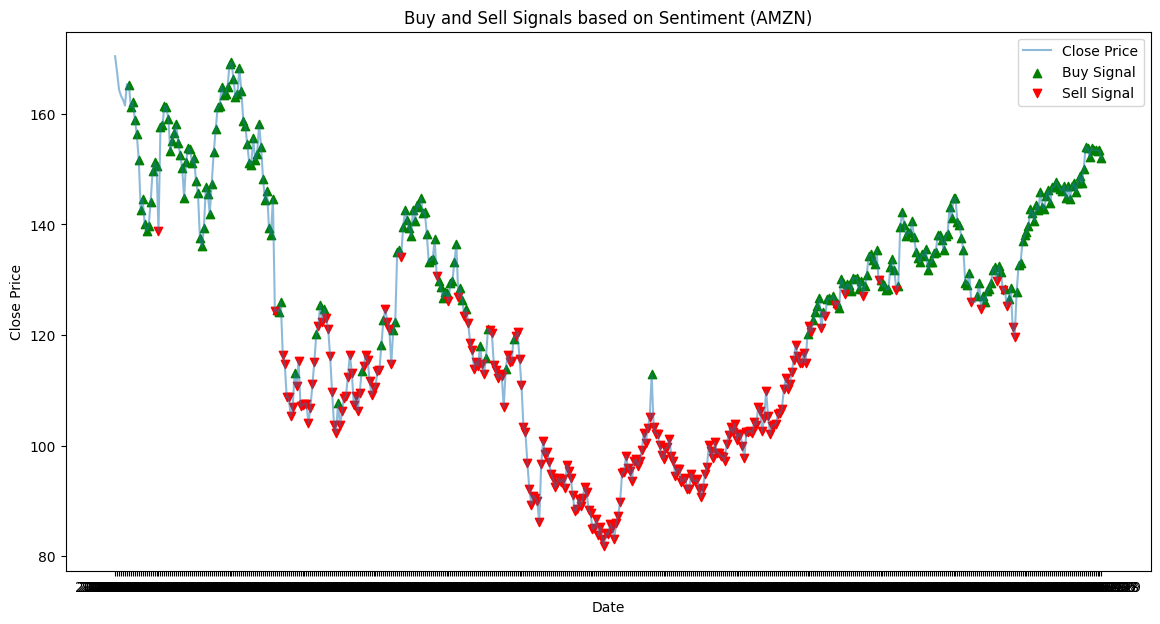

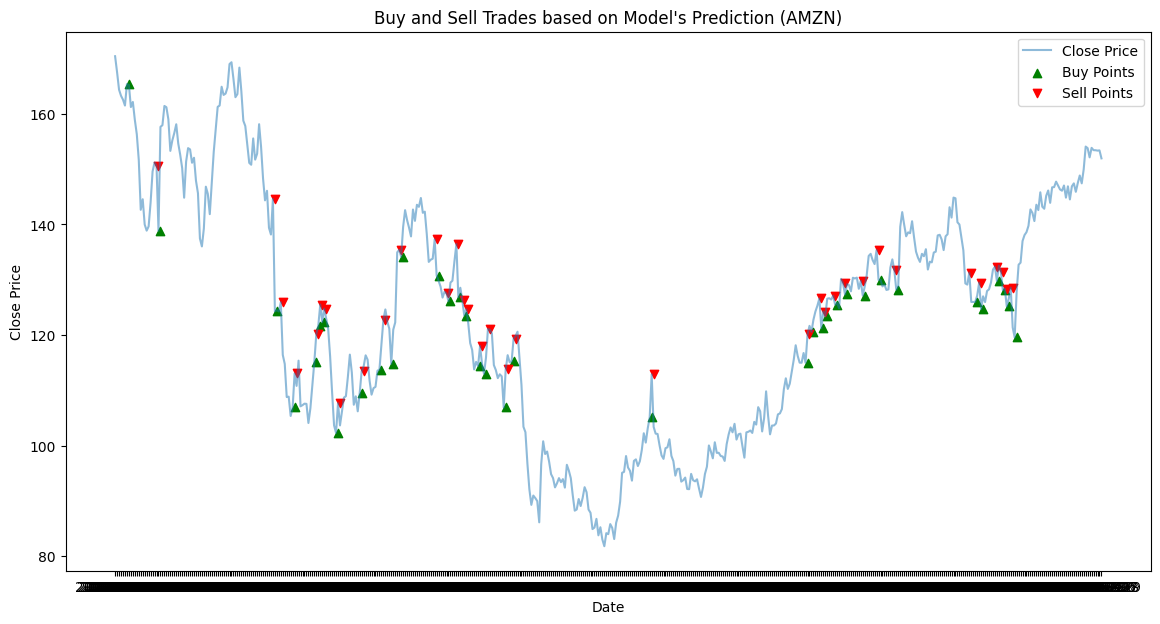

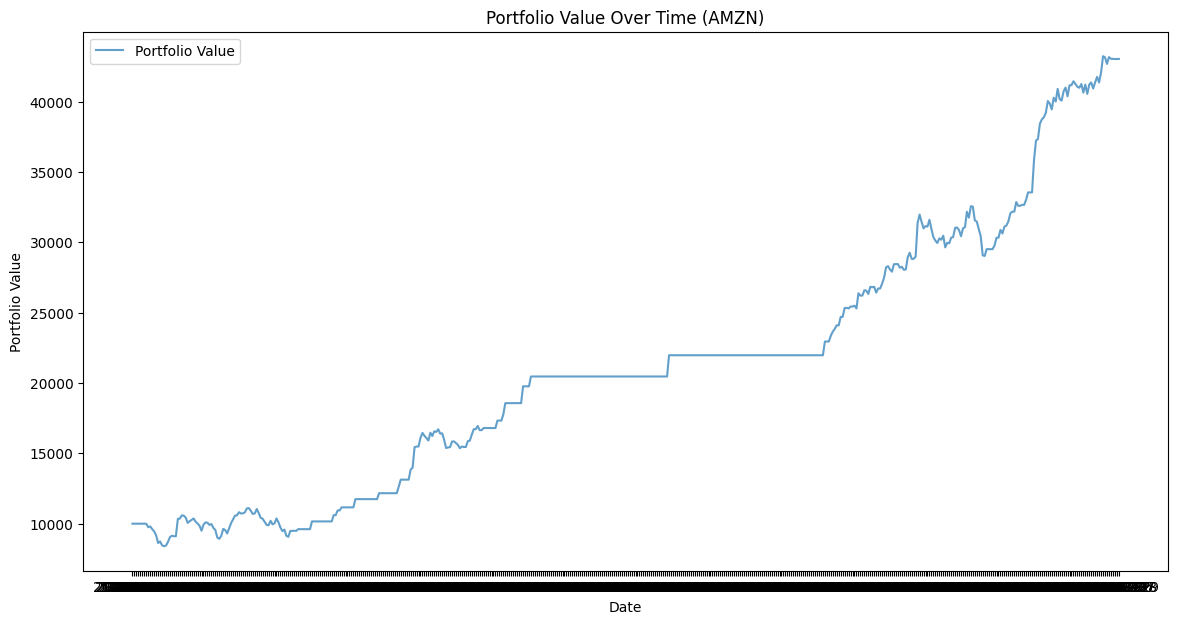

Final Portfolio Value: $43036.94
Total Return: 330.37%
Sharpe Ratio for AMZN: 0.027992430308928878
Maximum Drawdown for AMZN: -16.02%
Number of trades executed for AMZN: 71
Win ratio for AMZN: 88.73%


**************************************************


Using device: cuda


[*********************100%%**********************]  1 of 1 completed


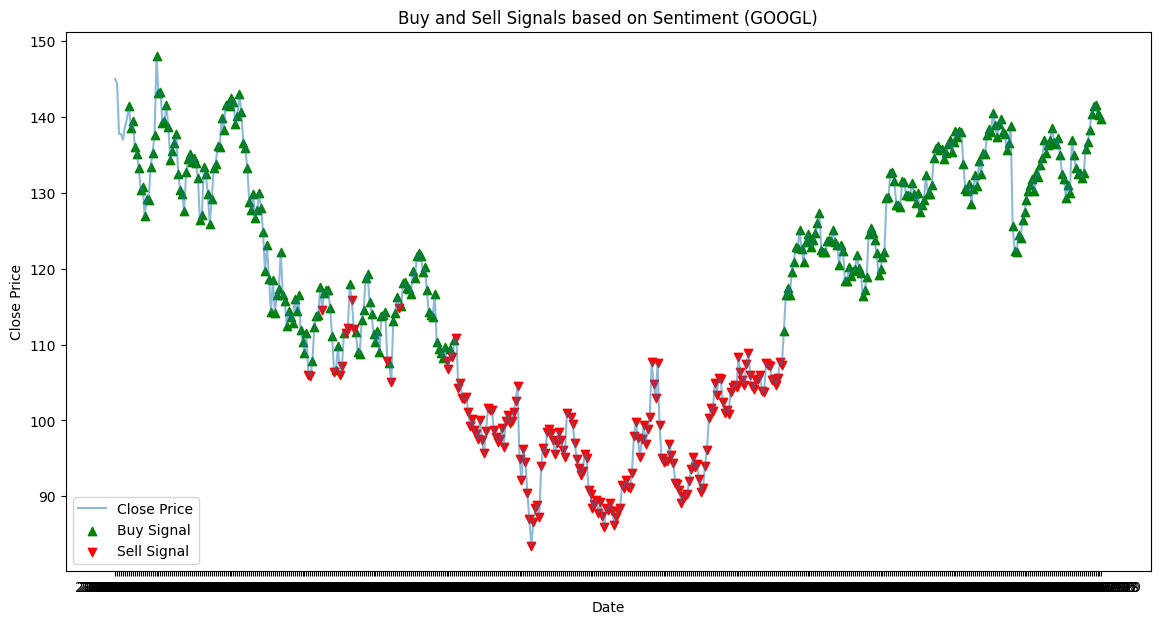

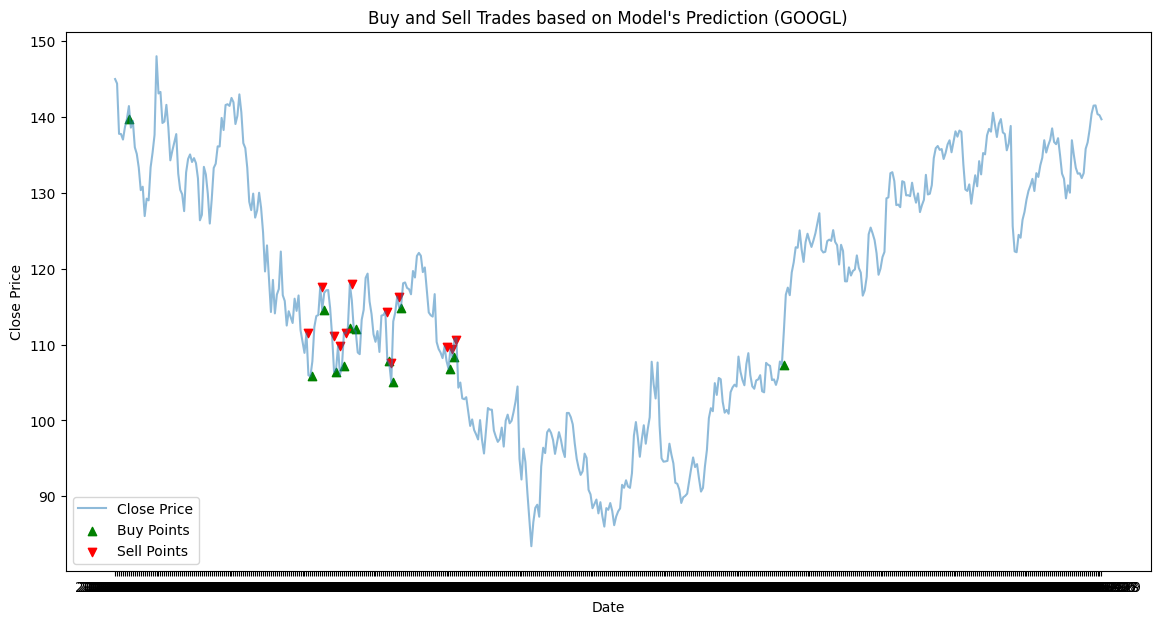

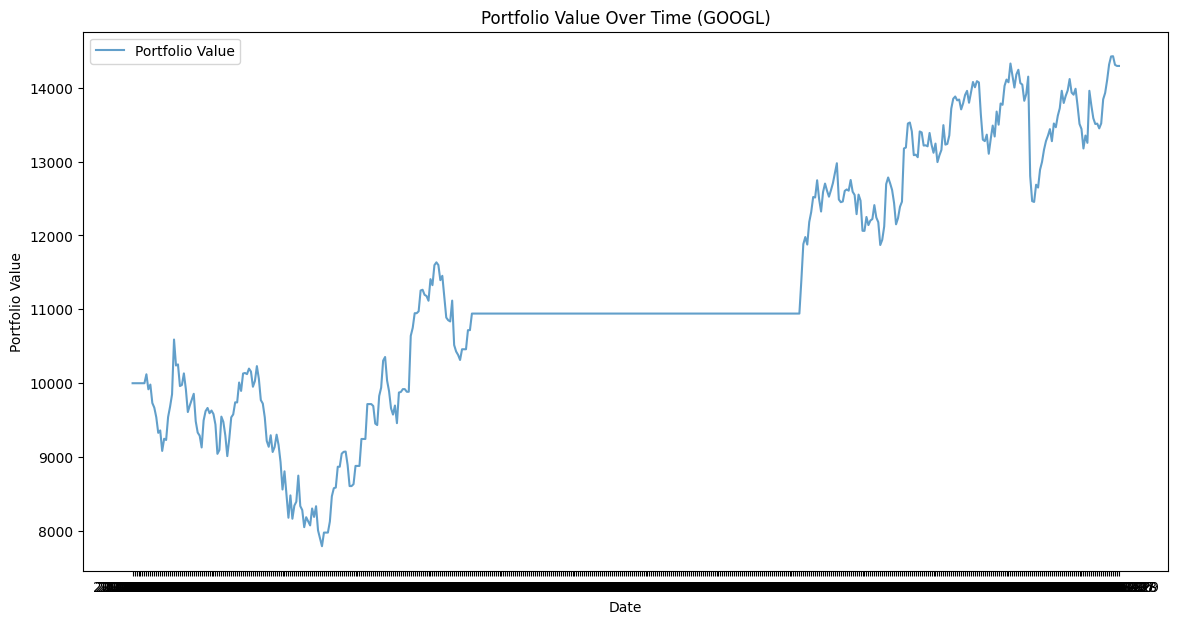

Final Portfolio Value: $14294.38
Total Return: 42.94%
Sharpe Ratio for GOOGL: 0.019812153775940044
Maximum Drawdown for GOOGL: -26.41%
Number of trades executed for GOOGL: 25
Win ratio for GOOGL: 88.00%


**************************************************


Using device: cuda


[*********************100%%**********************]  1 of 1 completed


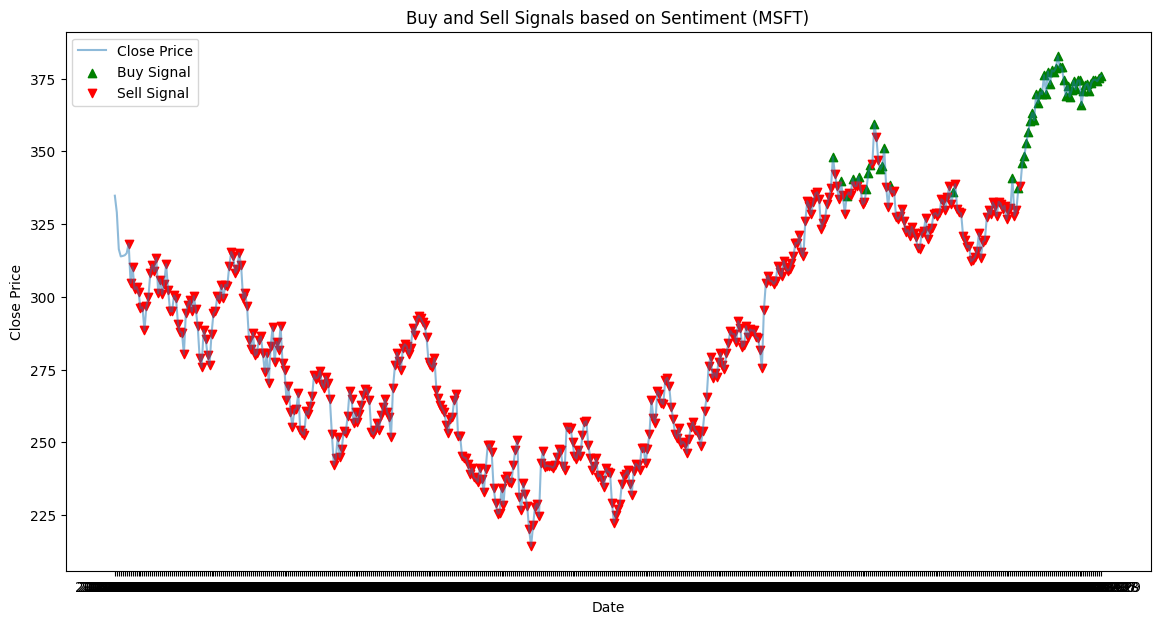

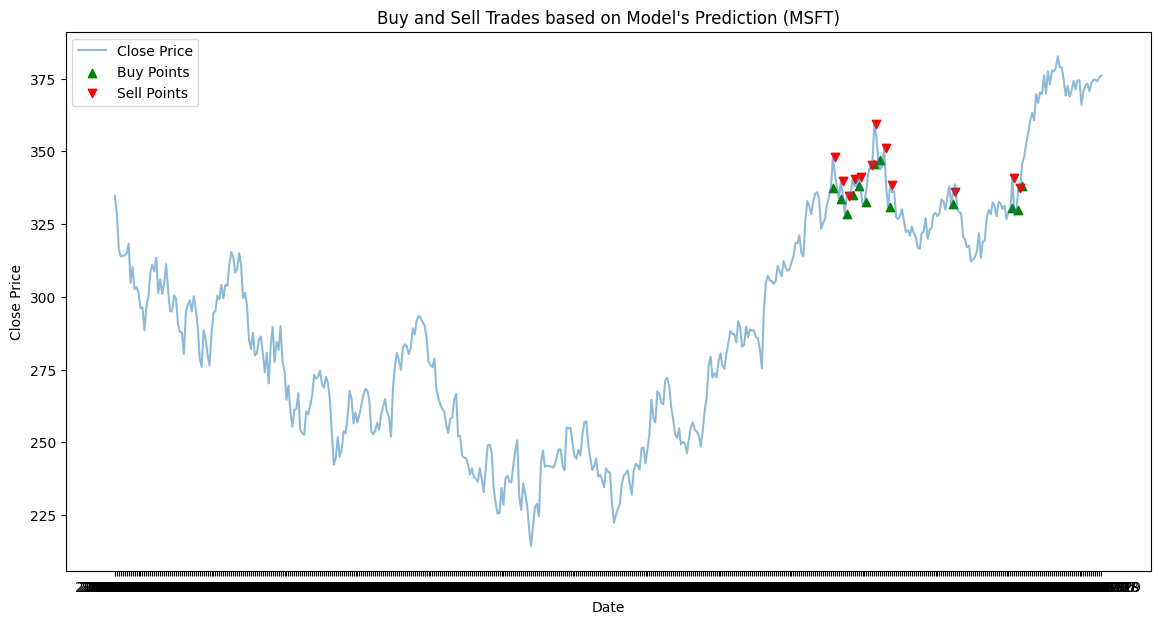

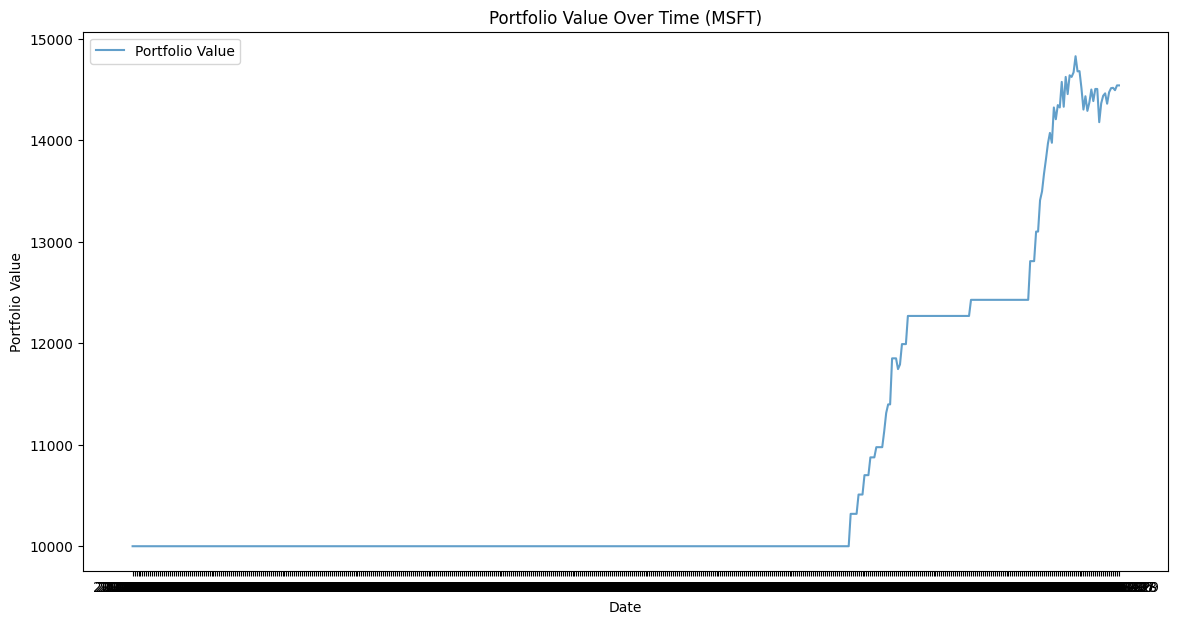

Final Portfolio Value: $14540.13
Total Return: 45.40%
Sharpe Ratio for MSFT: 0.24227244588332278
Maximum Drawdown for MSFT: 0.00%
Number of trades executed for MSFT: 25
Win ratio for MSFT: 80.00%


**************************************************




In [19]:
# Calculating portfolio

portfolio_stocks = ['AMZN','GOOGL','MSFT']

data_dic = {}
metrics_dic = {}

for stock in portfolio_stocks:
    test_financial_news = pd.read_csv(f'C:\\Users\\ASUS\\Desktop\\{stock}_test_financial_news.csv')
    
    test_data = sentiment_analysis(test_daily_news,test_financial_news)
    extract_features(test_data,['mean_pos','mean_neg'])
    
    test_market_data = get_market_data('2021-12-31','2024-01-01', stock)
    
    extract_features(test_market_data,['Close'])
    
    test_model_data = prepare_model_data(test_data,test_market_data)
    
    X = test_model_data.drop(columns = ['Label','Open','Date','Close','Adj Close','High','Low','Volume','mean_pos','mean_neg','mean_neu'])
    y = test_model_data['Label']
    
    sc = MinMaxScaler(feature_range=(0,1))
    X[X.columns] = sc.fit_transform(X[X.columns])
    
    y_pred = model.predict(X)
    y_pred = pd.DataFrame(y_pred, columns = ['Predicted Value'])
    
    test_model_data.reset_index(drop = True, inplace = True)
    
    trading_data = test_model_data.iloc[:,0:1].join(y_pred)
    
    test_market_data = pd.merge(test_market_data,trading_data,on = 'Date',how = 'left')
    
    
    
    
    
    test_market_data['Signal'] = 0

    for i in range(len(test_market_data)):
        if test_market_data['Predicted Value'][i] == 1:
            test_market_data['Signal'][i] = -1
        elif test_market_data['Predicted Value'][i] == 0:
            test_market_data['Signal'][i] = 1

    plt.figure(figsize=(14,7))
    plt.plot(test_market_data['Date'], test_market_data['Close'], label='Close Price', alpha=0.5)

    buy_signals = test_market_data[test_market_data['Signal'] == 1]
    sell_signals = test_market_data[test_market_data['Signal'] == -1]

    plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
    plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Buy and Sell Signals based on Sentiment ({stock})')
    plt.legend()
    plt.show()
    
    initial_cash = 10000
    cash = initial_cash
    shares = 0
    portfolio_values = []
    buy_dates = []
    sell_dates = []
    buy_prices = []
    sell_prices = []
    test_market_data['Portfolio Value'] = 10000
    test_market_data['Cash'] = None
    test_market_data['Shares'] = None
    
    for i in range(1,len(test_market_data)):
        if test_market_data['Signal'][i] == 1:
            if cash > 0:
                shares = cash / test_market_data['Close'][i-1]
                cash = 0
                buy_dates.append(test_market_data['Date'][i])
                buy_prices.append(test_market_data['Close'][i-1])
        elif test_market_data['Signal'][i] == -1:
            if shares > 0:
                cash = shares * test_market_data['Close'][i-1]
                shares = 0
                sell_dates.append(test_market_data['Date'][i])
                sell_prices.append(test_market_data['Close'][i-1])

        portfolio_value = cash + shares * test_market_data['Close'][i-1]
        test_market_data['Portfolio Value'][i-1] = portfolio_value
        test_market_data['Cash'][i] = cash
        test_market_data['Shares'][i] = shares
        
    test_market_data['Portfolio Value'].iloc[-1] = test_market_data['Portfolio Value'].iloc[-2]

    plt.figure(figsize=(14,7))
    plt.plot(test_market_data['Date'], test_market_data['Close'], label='Close Price', alpha=0.5)

    plt.scatter(buy_dates, buy_prices, marker='^', color='g', label='Buy Points', alpha=1)
    plt.scatter(sell_dates, sell_prices, marker='v', color='r', label='Sell Points', alpha=1)
    
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f"Buy and Sell Trades based on Model's Prediction ({stock})")
    plt.legend()
    plt.show()

    plt.figure(figsize=(14,7))
    plt.plot(test_market_data['Date'], test_market_data['Portfolio Value'], label='Portfolio Value', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title(f'Portfolio Value Over Time ({stock})')
    plt.legend()
    plt.show()

    final_portfolio_value = test_market_data['Portfolio Value'].iloc[-1]
    total_return = (final_portfolio_value - initial_cash) / initial_cash * 100
    print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    
    maximum_drawdown = MDD(test_market_data)
    trades_executed = len(buy_dates) + len(sell_dates)
    sharpe_ratio = Sharpe(test_market_data, buy_dates, sell_dates)
    win_ratio =  Win(test_market_data, buy_dates, sell_dates)
    
    metrics = {'Sharpe Ratio': sharpe_ratio, 'Maximum Drawdown': maximum_drawdown, 'Number of trades executed': trades_executed, 'Win Ratio': win_ratio}
    
    print(f'Sharpe Ratio for {stock}: {sharpe_ratio}')
    print(f'Maximum Drawdown for {stock}: {maximum_drawdown}')
    print(f'Number of trades executed for {stock}: {trades_executed}')
    print(f'Win ratio for {stock}: {win_ratio}')
    
    data_dic[stock] = test_market_data
    metrics_dic[stock] = metrics
    
    print('\n')    
    print('*'*50)
    print('\n')

### Analysing Portfolio Metrics

In [21]:
sharpe = []
drawdown = []
trades = []
win = []

for stock in list(data_dic.keys()):
    metrics = list(metrics_dic[stock].values())
    sharpe.append(metrics[0])
    drawdown.append(metrics[1])
    trades.append(metrics[2])
    win.append(metrics[3])

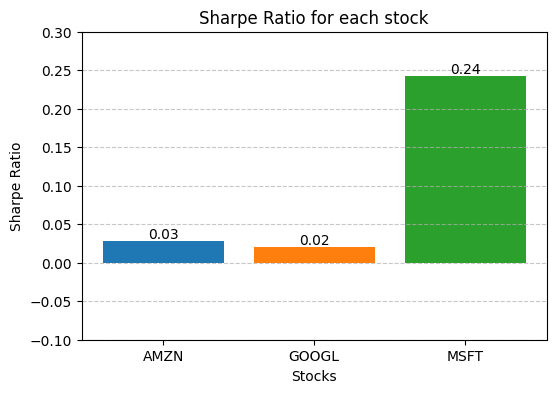

In [22]:
plt.figure(figsize=(6, 4))
bars = plt.bar(portfolio_stocks,sharpe, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.ylim([-0.1,0.3])
plt.title('Sharpe Ratio for each stock')
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

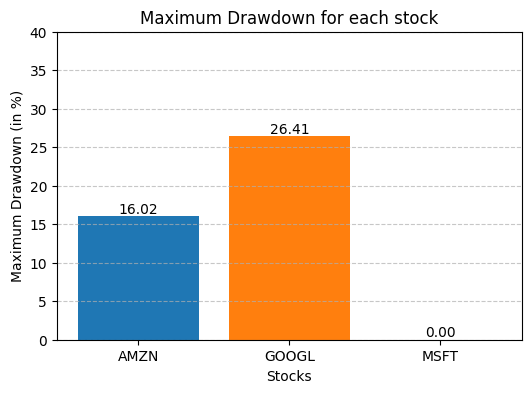

In [23]:
plt.figure(figsize=(6, 4))
bars = plt.bar(portfolio_stocks,[abs(float(x.strip('%'))) for x in drawdown], color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.ylim([0,40])
plt.title('Maximum Drawdown for each stock')
plt.xlabel('Stocks')
plt.ylabel('Maximum Drawdown (in %)')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

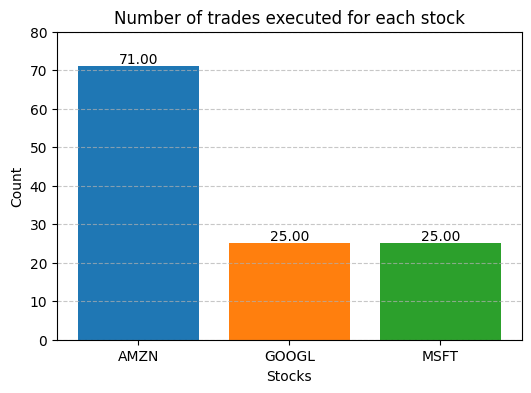

In [24]:
plt.figure(figsize=(6, 4))
bars = plt.bar(portfolio_stocks,trades, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.ylim([0,80])
plt.title('Number of trades executed for each stock')
plt.xlabel('Stocks')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

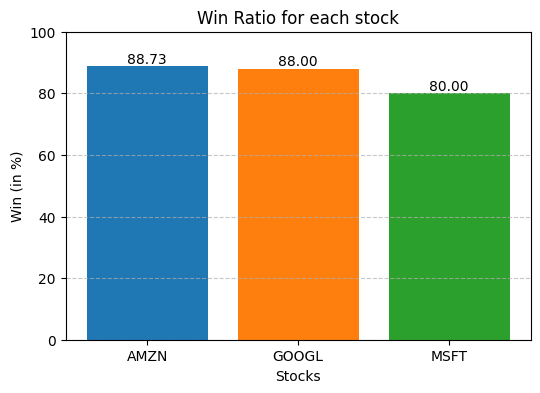

In [25]:
plt.figure(figsize=(6, 4))
bars = plt.bar(portfolio_stocks,[float(x.strip('%')) for x in win], color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.ylim([0,100])
plt.title('Win Ratio for each stock')
plt.xlabel('Stocks')
plt.ylabel('Win (in %)')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

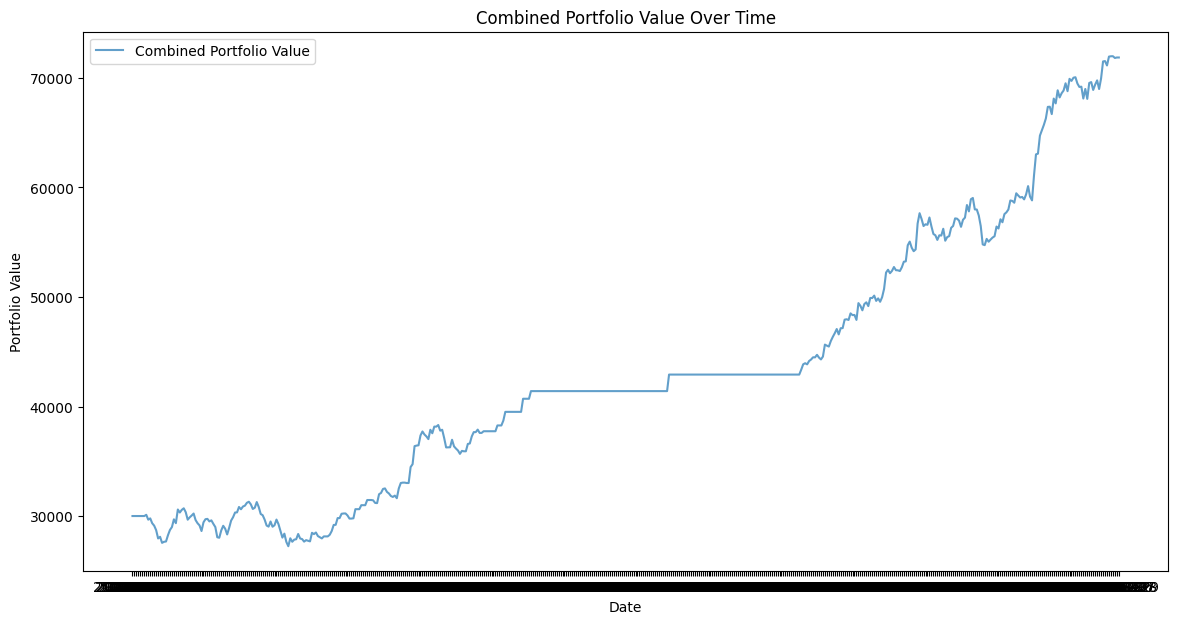

Mean final returns: 139.57%


In [26]:
combined_portfolio = [x + y + z for x, y, z in zip(list(data_dic['AMZN']['Portfolio Value']), list(data_dic['GOOGL']['Portfolio Value']), list(data_dic['MSFT']['Portfolio Value']))]

plt.figure(figsize=(14,7))
plt.plot(data_dic['AMZN']['Date'], combined_portfolio, label='Combined Portfolio Value', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Combined Portfolio Value Over Time')
plt.legend()
plt.show()

final_amount = 0
for stock in portfolio_stocks:
    final_amount += data_dic[stock]['Portfolio Value'].iloc[-1]
    
final_returns = ((final_amount - 30000)/30000)*100
print(f'Mean final returns: {final_returns:.2f}%')